In [43]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn.decomposition import PCA
import os
from src import config

In [44]:
features_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "sessions_features_df.pkl"))
labels_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "sessions_labels_df.pkl"))

In [45]:
features_df.head()

,Gaze_Counts_In_RoI_Pre,Gaze_Counts_In_RoI_Post,Gaze_Counts_Out_RoI_Pre,Gaze_Counts_Out_RoI_Post,Gaze_In\out_RoI_Ratio_Pre,Gaze_In\out_RoI_Ratio_Post,Gaze_Re_Entries_To_RoI_Count_Pre,Gaze_Re_Entries_To_RoI_Count_Post,Gaze_Re_Entries_To_RoI_Rate_Pre,Gaze_Re_Entries_To_RoI_Rate_Post,...,DVA_Max_Gaze_Post,DVA_Min_Gaze_Post,DVA_Mean_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Mean_Fixations_Post,DVA_Std_Fixations_Post,DVA_Max_Fixations_Post,DVA_Min_Fixations_Post
0,0,174,2459,2548,0.000000,0.068289,0,1,0.000000,0.212359,...,28.691923,2.745931,27.118966,5.393432,32.399848,17.047785,20.373510,7.767659,27.559437,3.880131
1,5,644,2899,1054,0.001725,0.611006,2,5,0.244918,1.499700,...,21.265993,0.111699,15.877488,9.457063,26.959536,0.000000,8.162678,7.592890,21.024691,0.312490
2,318,1788,3436,884,0.092549,2.022624,2,5,0.244918,1.034340,...,23.694669,0.288700,20.279908,7.552406,29.786582,3.441882,8.685760,8.735258,23.539461,0.699961
3,0,85,3788,1103,0.000000,0.077063,0,2,0.000000,1.454545,...,28.994276,5.026473,19.856741,6.848865,28.934395,10.483120,15.219668,7.849164,25.361122,7.018950
4,0,0,2927,1125,0.000000,0.000000,0,0,0.000000,0.000000,...,10.844623,3.908509,10.686893,0.307897,10.945281,10.346211,5.248038,1.729817,6.471203,4.024872


In [46]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Columns: 116 entries, Gaze_Counts_In_RoI_Pre to DVA_Min_Fixations_Post
dtypes: float64(107), int32(9)
memory usage: 1.3 MB


In [47]:
labels_df.head()

,Session
series_id,
0,0
1,0
2,1
3,1
4,1


In [48]:
labels_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 0 to 1559
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Session  1560 non-null   int32
dtypes: int32(1)
memory usage: 18.3 KB


Data Cleaning

how many missing values are there in each column? show the top 10

In [49]:
features_df.isna().sum(axis=0).sort_values(ascending=False).head(10)

Pupil radius_Fixations_First_Diff_Pre            392
Pupil radius_Fixations_ReEntry_Mean_Diff_Post    392
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre     392
Pupil radius_Fixations_First_Diff_Post           392
vis_angle_Min_Saccades_Start_In_RoI_Pre          297
vis_angle_Max_Saccades_Start_In_RoI_Post         297
onset_Mean_Saccades_Start_In_RoI_Post            297
peak_velocity_Min_Saccades_Start_In_RoI_Pre      297
peak_velocity_Min_Saccades_Start_In_RoI_Post     297
vis_angle_Min_Saccades_Start_In_RoI_Post         297
dtype: int64

Remove columns with more than 30% missing values

In [50]:
features_df = features_df.loc[:, features_df.isna().sum(axis=0) < 0.3 * features_df.shape[0]]

In [51]:
features_df.isna().sum(axis=0).sort_values(ascending=False).head(10)

Pupil radius_Fixations_First_Diff_Pre            392
Pupil radius_Fixations_ReEntry_Mean_Diff_Post    392
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre     392
Pupil radius_Fixations_First_Diff_Post           392
vis_angle_Min_Saccades_Start_In_RoI_Pre          297
vis_angle_Max_Saccades_Start_In_RoI_Post         297
onset_Mean_Saccades_Start_In_RoI_Post            297
peak_velocity_Min_Saccades_Start_In_RoI_Pre      297
peak_velocity_Min_Saccades_Start_In_RoI_Post     297
vis_angle_Min_Saccades_Start_In_RoI_Post         297
dtype: int64

how many missing values are there in each row? show the top 10

In [52]:
features_df.isna().sum(axis=1).sort_values(ascending=False).head(10)

338     72
1247    69
1096    69
1236    69
1034    69
1314    69
1143    68
1158    68
558     68
1430    68
dtype: int64

Remove rows with more than 30% missing values

In [53]:
features_df = features_df.loc[features_df.isna().sum(axis=1) < 0.3 * features_df.shape[1], :]
# remove the corresponding rows from y_train
labels_df = labels_df.loc[labels_df.index.isin(features_df.index)]

In [54]:
features_df.isna().sum(axis=1).sort_values(ascending=False).head(10)

1168    32
1380    32
246     32
75      32
59      28
297     28
178     28
1139    28
307     28
1144    25
dtype: int64

Train/Test Split (before any preprocessing is done)

In [55]:
series_id_df = pd.read_pickle(os.path.join(config.classification_resource_dir, "sessions_series_id_df.pkl"))

# Create a list of unique subject IDs
subject_ids = series_id_df[config.SUBJECT].unique()

# Shuffle the list of subject IDs randomly
random = np.random
random.seed(1)
random.shuffle(subject_ids)

# Split the list of subject IDs into two parts
train_subject_ids = subject_ids[:int(len(subject_ids)*0.9)]
test_subject_ids = subject_ids[int(len(subject_ids)*0.9):]

# Subset the data based on the split list of subject IDs
train_data = series_id_df[series_id_df[config.SUBJECT].isin(train_subject_ids)]
test_data = series_id_df[series_id_df[config.SUBJECT].isin(test_subject_ids)]

X_train = features_df[features_df.index.isin(train_data.index)]
X_test = features_df[features_df.index.isin(test_data.index)]
y_train = labels_df[labels_df.index.isin(train_data.index)]
y_test = labels_df[labels_df.index.isin(test_data.index)]

In [56]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(features_df,
#                                                     labels_df,
#                                                     random_state=420,
#                                                     test_size=0.2)

In [57]:
X_train.head()

,Gaze_Counts_In_RoI_Pre,Gaze_Counts_In_RoI_Post,Gaze_Counts_Out_RoI_Pre,Gaze_Counts_Out_RoI_Post,Gaze_In\out_RoI_Ratio_Pre,Gaze_In\out_RoI_Ratio_Post,Gaze_Re_Entries_To_RoI_Count_Pre,Gaze_Re_Entries_To_RoI_Count_Post,Gaze_Re_Entries_To_RoI_Rate_Pre,Gaze_Re_Entries_To_RoI_Rate_Post,...,DVA_Max_Gaze_Post,DVA_Min_Gaze_Post,DVA_Mean_Fixations_Pre,DVA_Std_Fixations_Pre,DVA_Max_Fixations_Pre,DVA_Min_Fixations_Pre,DVA_Mean_Fixations_Post,DVA_Std_Fixations_Post,DVA_Max_Fixations_Post,DVA_Min_Fixations_Post
0,0,174,2459,2548,0.000000,0.068289,0,1,0.000000,0.212359,...,28.691923,2.745931,27.118966,5.393432,32.399848,17.047785,20.373510,7.767659,27.559437,3.880131
1,5,644,2899,1054,0.001725,0.611006,2,5,0.244918,1.499700,...,21.265993,0.111699,15.877488,9.457063,26.959536,0.000000,8.162678,7.592890,21.024691,0.312490
2,318,1788,3436,884,0.092549,2.022624,2,5,0.244918,1.034340,...,23.694669,0.288700,20.279908,7.552406,29.786582,3.441882,8.685760,8.735258,23.539461,0.699961
5,5,1436,4013,855,0.001246,1.679532,2,12,0.234165,2.999500,...,21.351270,0.466678,14.152719,4.801909,20.150100,6.715828,6.637577,6.123387,21.077867,2.501169
6,0,349,3185,1625,0.000000,0.214769,0,2,0.000000,0.600000,...,22.848866,1.377033,16.569913,4.120731,25.430856,7.314865,11.688502,6.852192,21.486319,1.530442


Fill missing values with the mean of the column

In [58]:
X_train = X_train.fillna(X_train.mean()) # fill missing values with the mean of the column or zero ? features_df.mean()
X_test = X_test.fillna(X_train.mean())

Balancing the dataset

In [59]:
y_train.value_counts()

Session
1          565
0          538
dtype: int64

Scaling

In [60]:
from sklearn.preprocessing import StandardScaler

# Create separate StandardScaler instances
scaler_x = StandardScaler()
# scaler_y = StandardScaler()

# Fit on Training Data (!)
scaler_x.fit(X_train.values)
# scaler_y.fit(y_train.values.reshape(-1, 1))

# Transform both training and testing data
X_train_scaled = scaler_x.transform(X_train.values)
X_test_scaled = scaler_x.transform(X_test.values)
y_train = y_train.values.reshape(-1, 1).flatten()
y_test = y_test.values.reshape(-1, 1).flatten()

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

PCA

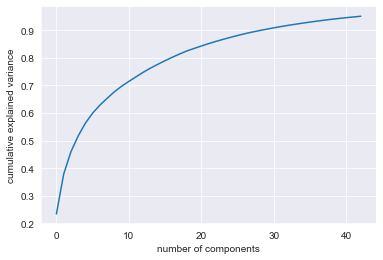

In [61]:
pca = PCA(n_components=0.95).fit(X_train_scaled)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

In [62]:
X_train_pca = pca.transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [63]:
X_train_pca

array([[-7.04852666,  1.54534233,  0.02460516, ...,  0.0413768 ,
        -0.98806959, -0.39464929],
       [-3.10124403, -3.9784705 , -2.18706163, ...,  1.28090655,
         0.22846462,  0.82942282],
       [ 5.96258886, -2.25895834, -7.52499972, ...,  0.36173254,
        -0.29741428,  0.38806791],
       ...,
       [-5.98499668,  1.43662393,  2.28639761, ...,  0.35409411,
        -1.35658342, -1.13340609],
       [-5.54839348,  1.56752961,  1.55385865, ..., -0.98611094,
         0.76765982,  0.71333668],
       [ 2.44386741, -2.00521996, -2.60288282, ..., -0.27439866,
        -0.11444258, -0.1555332 ]])

LDA

In [64]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=1)
X_train_lda = lda.fit_transform(X_train_scaled, y_train)
X_test_lda = lda.transform(X_test_scaled)

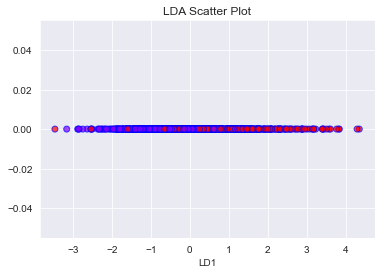

In [65]:
# Create a scatter plot of the transformed data
plt.scatter(X_train_lda, np.zeros(len(X_train_lda)), c=y_train, cmap='rainbow', alpha=0.7, edgecolors='b')
plt.xlabel('LD1')
plt.title('LDA Scatter Plot')
plt.show()

In [66]:
X_train_preprocessed = X_train_scaled
X_test_preprocessed = X_test_scaled

Classification models

In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns

def evaluate_model(model_name, y_true, y_pred):
    # Evaluate the model using various metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred)

    print(model_name)
    # Print the evaluation metrics
    print("Accuracy:", round(accuracy, 2))
    print("Precision:", round(precision, 2))
    print("Recall:", round(recall, 2))
    print("F1-score:", round(f1, 2))
    print("ROC-AUC score:", round(roc_auc, 2))

    # Compute the confusion matrix
    confusion_mat = confusion_matrix(y_true, y_pred)

    # Create a heatmap visualization of the confusion matrix
    fig, ax = plt.subplots(figsize=(8, 8))
    sns.heatmap(confusion_mat, annot=True, cmap="Blues", fmt="d", ax=ax)

    # Set the axis labels and title
    ax.set_xlabel("Predicted Labels")
    ax.set_ylabel("True Labels")
    ax.set_title("Confusion Matrix")

    # Show the plot
    plt.show()

In [68]:
from sklearn.model_selection import GridSearchCV

Logistic Regression model

In [69]:
from sklearn.linear_model import LogisticRegression

# Define the range of values for each hyperparameter
C = np.linspace(0.01, 0.9, 15)
PENALTY = ['l1', 'l2']
SOLVER = ['liblinear', 'saga']

PARAM_GRID  = {
    'C': C,
    'penalty': PENALTY,
    'solver': SOLVER
}

# Create the logistic regression estimator
estimator = LogisticRegression(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was re

{'C': 0.7728571428571429, 'penalty': 'l1', 'solver': 'liblinear'}

Logistic Regression (test data)
Accuracy: 0.61
Precision: 0.61
Recall: 0.67
F1-score: 0.64
ROC-AUC score: 0.61


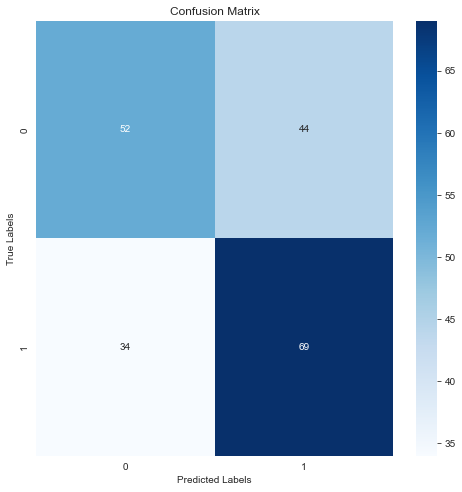

In [70]:
# Get the best estimator
log_reg_best_estimator = model_searcher.best_estimator_
y_test_pred = log_reg_best_estimator.predict(X_test_preprocessed)

evaluate_model("Logistic Regression (test data)", y_test, y_test_pred)

Gradient Boosting model

In [71]:
from sklearn.ensemble import GradientBoostingClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.01, 0.5, 10)
MAX_DEPTH = range(2, 4)
N_ESTIMATORS = range(100, 250, 15)


PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the gradient boosting estimator
estimator = GradientBoostingClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.06444444444444444, 'max_depth': 2, 'n_estimators': 130}

Gradient Boosting (test data)
Accuracy: 0.63
Precision: 0.64
Recall: 0.67
F1-score: 0.65
ROC-AUC score: 0.63


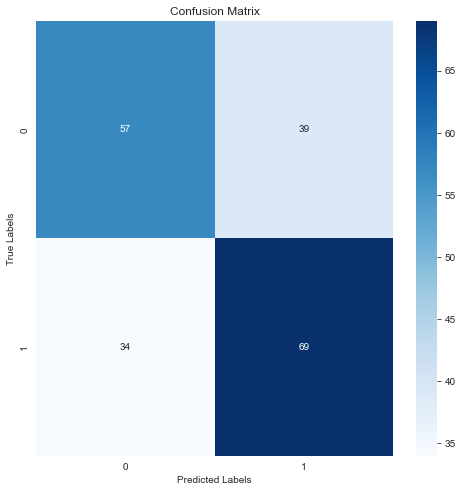

In [72]:
# Get the best estimator
gb_best_estimator = model_searcher.best_estimator_
y_test_pred = gb_best_estimator.predict(X_test_preprocessed)

evaluate_model("Gradient Boosting (test data)", y_test, y_test_pred)

Random Forest model

In [73]:
from sklearn.ensemble import RandomForestClassifier

# Define the range of values for each hyperparameter
N_ESTIMATORS = range(50, 120, 15)
MAX_DEPTH = range(2, 5)
MIN_SAMPLES_SPLIT = range(2, 4)
MIN_SAMPLES_LEAF = range(1, 5)

PARAM_GRID  = {
    'n_estimators': N_ESTIMATORS,
    'max_depth': MAX_DEPTH,
    'min_samples_split': MIN_SAMPLES_SPLIT,
    'min_samples_leaf': MIN_SAMPLES_LEAF
}

# Create the random forest estimator
estimator = RandomForestClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'n_estimators': 110}

Random Forest (test data)
Accuracy: 0.64
Precision: 0.67
Recall: 0.58
F1-score: 0.62
ROC-AUC score: 0.64


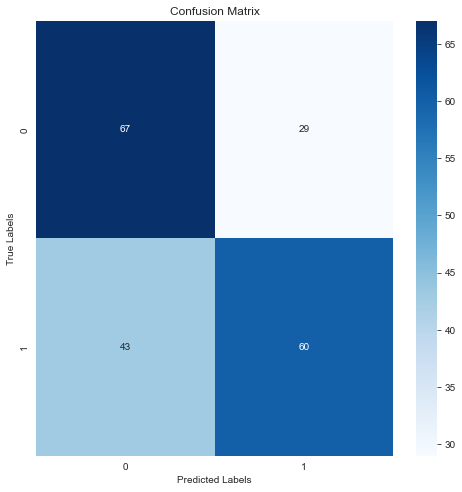

In [74]:
rf_best_estimator = model_searcher.best_estimator_
y_test_pred = rf_best_estimator.predict(X_test_preprocessed)

evaluate_model("Random Forest (test data)", y_test, y_test_pred)

XGBoost model

In [75]:
from xgboost import XGBClassifier

# Define the range of values for each hyperparameter
LEARNING_RATE = np.linspace(0.05, 1, 10)
MAX_DEPTH = range(1, 4)
N_ESTIMATORS = range(70, 150, 15)

PARAM_GRID  = {
    'learning_rate': LEARNING_RATE,
    'max_depth': MAX_DEPTH,
    'n_estimators': N_ESTIMATORS
}

# Create the XGBoost estimator
estimator = XGBClassifier(random_state=420)

# Use grid search and cross-validation to tune the hyper parameters
model_searcher = GridSearchCV(estimator, PARAM_GRID, verbose=0)
model_searcher.fit(X_train_preprocessed, y_train)

# The best combination of hyperparameters
model_searcher.best_params_

{'learning_rate': 0.05, 'max_depth': 1, 'n_estimators': 100}

Evaluate the best model on the test data

XGBoost (test data)
Accuracy: 0.65
Precision: 0.67
Recall: 0.63
F1-score: 0.65
ROC-AUC score: 0.65


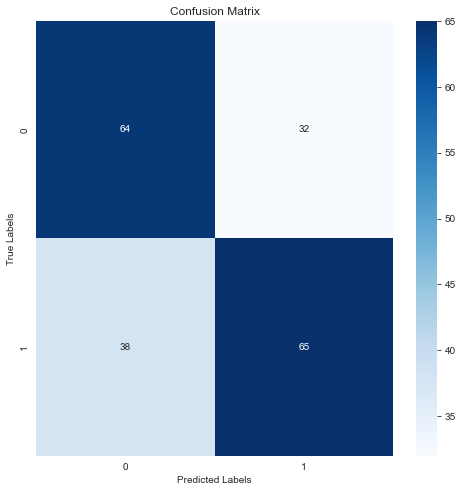

In [76]:
xgb_best_estimator = model_searcher.best_estimator_
y_test_pred = xgb_best_estimator.predict(X_test_preprocessed)

evaluate_model("XGBoost (test data)", y_test, y_test_pred)

TabNetClassifier with automatic hyperparameters tuning

In [77]:
!pip install pytorch-tabnet
!pip install optuna

In [78]:
# Convert Pandas DataFrame to NumPy array
X_train_np = X_train_preprocessed.values
X_test_np = X_test_preprocessed.values

In [79]:
import torch
from pytorch_tabnet.tab_model import TabNetClassifier
import optuna
from sklearn.metrics import mean_squared_error

# Define objective function for optuna
def objective(trial):
    # Generate hyperparameter search space
    params = {
        'n_d': trial.suggest_int('n_d', 8, 64),
        'n_a': trial.suggest_int('n_a', 8, 64),
        'n_steps': trial.suggest_int('n_steps', 1, 10),
        'gamma': trial.suggest_float('gamma', 0.1, 2.0),
        'n_independent': trial.suggest_int('n_independent', 1, 10),
        'n_shared': trial.suggest_int('n_shared', 1, 10),
        'lambda_sparse': trial.suggest_float('lambda_sparse', 0.0001, 0.1),
        # 'optimizer_fn': torch.optim.Adam,
        # 'optimizer_params': dict(lr=2e-2, weight_decay=1e-5),
        # 'mask_type': 'entmax',
        # 'scheduler_params': dict(mode="min", patience=5, min_lr=1e-5, factor=0.9,),
        # 'scheduler_fn': torch.optim.lr_scheduler.ReduceLROnPlateau,
        'verbose': 0
    }

    # Create TabNetClassifier object with hyperparameters from optuna
    classifier = TabNetClassifier(**params)

    # Train and evaluate the model
    classifier.fit(X_train_np, y_train, eval_set=[(X_test_np, y_test)])
    val_preds = classifier.predict_proba(X_test_np)[:, 1]
    val_auc = roc_auc_score(y_test, val_preds)

    return val_auc

# Create optuna study
study = optuna.create_study(direction='maximize')

# Optimize hyperparameters using optuna
study.optimize(objective, n_trials=42, timeout=600)

# Get best hyperparameters from optuna
best_params = study.best_trial.params

# Train final model with best hyperparameters
tabnet_classifier = TabNetClassifier(**best_params)
tabnet_classifier.fit(X_train_np, y_train)
best_params

[I 2023-06-11 16:02:52,235] A new study created in memory with name: no-name-e8636c8f-81d6-4d8d-a6a2-b7dacfd7c07b
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:02:56,590] Trial 0 finished with value: 0.5991100323624595 and parameters: {'n_d': 21, 'n_a': 31, 'n_steps': 4, 'gamma': 0.5969690129853337, 'n_independent': 10, 'n_shared': 7, 'lambda_sparse': 0.08191859425188829}. Best is trial 0 with value: 0.5991100323624595.



Early stopping occurred at epoch 15 with best_epoch = 5 and best_val_0_auc = 0.59911

Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.59102


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:07,848] Trial 1 finished with value: 0.5910194174757284 and parameters: {'n_d': 43, 'n_a': 54, 'n_steps': 9, 'gamma': 1.8302346630669597, 'n_independent': 8, 'n_shared': 2, 'lambda_sparse': 0.005025082348718958}. Best is trial 0 with value: 0.5991100323624595.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:09,583] Trial 2 finished with value: 0.6090210355987055 and parameters: {'n_d': 57, 'n_a': 19, 'n_steps': 1, 'gamma': 0.15983218306825214, 'n_independent': 6, 'n_shared': 10, 'lambda_sparse': 0.015113200206222296}. Best is trial 2 with value: 0.6090210355987055.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.60902

Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.61367


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:21,610] Trial 3 finished with value: 0.6136731391585761 and parameters: {'n_d': 50, 'n_a': 56, 'n_steps': 5, 'gamma': 0.9295296130770874, 'n_independent': 9, 'n_shared': 9, 'lambda_sparse': 0.026182163649226806}. Best is trial 3 with value: 0.6136731391585761.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:29,190] Trial 4 finished with value: 0.6465412621359223 and parameters: {'n_d': 55, 'n_a': 63, 'n_steps': 4, 'gamma': 0.11732819064241123, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.03952565143053492}. Best is trial 4 with value: 0.6465412621359223.



Early stopping occurred at epoch 38 with best_epoch = 28 and best_val_0_auc = 0.64654


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:31,897] Trial 5 finished with value: 0.6146844660194175 and parameters: {'n_d': 47, 'n_a': 28, 'n_steps': 5, 'gamma': 1.03026532214407, 'n_independent': 2, 'n_shared': 6, 'lambda_sparse': 0.016194923674211093}. Best is trial 4 with value: 0.6465412621359223.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.61468

Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.54637


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:41,241] Trial 6 finished with value: 0.5463693365695793 and parameters: {'n_d': 49, 'n_a': 56, 'n_steps': 9, 'gamma': 1.2444905620317457, 'n_independent': 5, 'n_shared': 10, 'lambda_sparse': 0.08508819552224502}. Best is trial 4 with value: 0.6465412621359223.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:43,715] Trial 7 finished with value: 0.6559466019417476 and parameters: {'n_d': 11, 'n_a': 46, 'n_steps': 3, 'gamma': 1.4434642729069582, 'n_independent': 5, 'n_shared': 5, 'lambda_sparse': 0.0807346407601265}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.65595


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:45,639] Trial 8 finished with value: 0.5315533980582524 and parameters: {'n_d': 29, 'n_a': 13, 'n_steps': 5, 'gamma': 1.0082269088491465, 'n_independent': 1, 'n_shared': 6, 'lambda_sparse': 0.08879591593947415}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.53155


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:46,696] Trial 9 finished with value: 0.5923847087378642 and parameters: {'n_d': 45, 'n_a': 59, 'n_steps': 3, 'gamma': 1.2019948980400632, 'n_independent': 1, 'n_shared': 1, 'lambda_sparse': 0.010084412386043814}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 16 with best_epoch = 6 and best_val_0_auc = 0.59238


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:47,576] Trial 10 finished with value: 0.5941039644012945 and parameters: {'n_d': 8, 'n_a': 43, 'n_steps': 1, 'gamma': 1.7668672752539336, 'n_independent': 5, 'n_shared': 4, 'lambda_sparse': 0.06313640097155587}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.5941


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:50,555] Trial 11 finished with value: 0.643456715210356 and parameters: {'n_d': 61, 'n_a': 43, 'n_steps': 7, 'gamma': 0.144060773558621, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.05158744779267876}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.64346


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:53,661] Trial 12 finished with value: 0.6422936893203884 and parameters: {'n_d': 8, 'n_a': 44, 'n_steps': 3, 'gamma': 1.5258243391408324, 'n_independent': 4, 'n_shared': 4, 'lambda_sparse': 0.038442955755781695}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 27 with best_epoch = 17 and best_val_0_auc = 0.64229


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:03:59,559] Trial 13 finished with value: 0.6429004854368932 and parameters: {'n_d': 33, 'n_a': 64, 'n_steps': 3, 'gamma': 0.6441982453515256, 'n_independent': 7, 'n_shared': 3, 'lambda_sparse': 0.0987931764600959}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 32 with best_epoch = 22 and best_val_0_auc = 0.6429


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:06,987] Trial 14 finished with value: 0.5807038834951457 and parameters: {'n_d': 20, 'n_a': 47, 'n_steps': 7, 'gamma': 1.4935460127833209, 'n_independent': 3, 'n_shared': 8, 'lambda_sparse': 0.06736495569963974}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.5807


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:10,746] Trial 15 finished with value: 0.6360234627831716 and parameters: {'n_d': 64, 'n_a': 64, 'n_steps': 2, 'gamma': 1.9912491865678166, 'n_independent': 4, 'n_shared': 5, 'lambda_sparse': 0.03846299030291496}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 19 with best_epoch = 9 and best_val_0_auc = 0.63602


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:18,607] Trial 16 finished with value: 0.6432038834951457 and parameters: {'n_d': 21, 'n_a': 49, 'n_steps': 7, 'gamma': 0.3966651082465257, 'n_independent': 6, 'n_shared': 2, 'lambda_sparse': 0.06348824779752922}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.6432


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:20,688] Trial 17 finished with value: 0.5882888349514563 and parameters: {'n_d': 36, 'n_a': 36, 'n_steps': 4, 'gamma': 0.7602093751429722, 'n_independent': 3, 'n_shared': 5, 'lambda_sparse': 0.04977385691491463}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.58829

Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.5896


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:29,544] Trial 18 finished with value: 0.5896035598705502 and parameters: {'n_d': 29, 'n_a': 37, 'n_steps': 6, 'gamma': 0.38482618741964325, 'n_independent': 7, 'n_shared': 7, 'lambda_sparse': 0.07449262017706004}. Best is trial 7 with value: 0.6559466019417476.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:31,846] Trial 19 finished with value: 0.6314724919093851 and parameters: {'n_d': 55, 'n_a': 50, 'n_steps': 2, 'gamma': 1.2408524937167305, 'n_independent': 4, 'n_shared': 3, 'lambda_sparse': 0.09734770771301039}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 22 with best_epoch = 12 and best_val_0_auc = 0.63147


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:35,501] Trial 20 finished with value: 0.5410598705501619 and parameters: {'n_d': 15, 'n_a': 24, 'n_steps': 10, 'gamma': 0.8347866535655877, 'n_independent': 2, 'n_shared': 7, 'lambda_sparse': 0.07853426899602264}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.54106


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:39,297] Trial 21 finished with value: 0.6204490291262137 and parameters: {'n_d': 61, 'n_a': 39, 'n_steps': 7, 'gamma': 0.12492045503052716, 'n_independent': 3, 'n_shared': 4, 'lambda_sparse': 0.051865978728546556}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 13 with best_epoch = 3 and best_val_0_auc = 0.62045


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:42,026] Trial 22 finished with value: 0.5962783171521036 and parameters: {'n_d': 56, 'n_a': 42, 'n_steps': 6, 'gamma': 0.27193123325320756, 'n_independent': 2, 'n_shared': 5, 'lambda_sparse': 0.05169001630031938}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.59628


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:45,596] Trial 23 finished with value: 0.6159991909385113 and parameters: {'n_d': 42, 'n_a': 33, 'n_steps': 8, 'gamma': 0.37833041963394576, 'n_independent': 4, 'n_shared': 3, 'lambda_sparse': 0.07145383761764117}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 12 with best_epoch = 2 and best_val_0_auc = 0.616


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:48,833] Trial 24 finished with value: 0.6210558252427185 and parameters: {'n_d': 60, 'n_a': 51, 'n_steps': 4, 'gamma': 0.5393844702785258, 'n_independent': 5, 'n_shared': 4, 'lambda_sparse': 0.060632270477366704}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.62106


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:51,495] Trial 25 finished with value: 0.6316747572815533 and parameters: {'n_d': 64, 'n_a': 8, 'n_steps': 2, 'gamma': 0.19777384901110423, 'n_independent': 3, 'n_shared': 6, 'lambda_sparse': 0.03639223430785774}. Best is trial 7 with value: 0.6559466019417476.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.63167


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:55,985] Trial 26 finished with value: 0.6658576051779935 and parameters: {'n_d': 54, 'n_a': 61, 'n_steps': 6, 'gamma': 0.2975023574043639, 'n_independent': 2, 'n_shared': 2, 'lambda_sparse': 0.05588430558820415}. Best is trial 26 with value: 0.6658576051779935.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.66586


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:57,345] Trial 27 finished with value: 0.6035598705501618 and parameters: {'n_d': 52, 'n_a': 60, 'n_steps': 4, 'gamma': 0.29945580086352197, 'n_independent': 1, 'n_shared': 1, 'lambda_sparse': 0.07408447942688862}. Best is trial 26 with value: 0.6658576051779935.



Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.60356


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:04:59,205] Trial 28 finished with value: 0.6182241100323626 and parameters: {'n_d': 40, 'n_a': 62, 'n_steps': 6, 'gamma': 0.5415039950793055, 'n_independent': 2, 'n_shared': 2, 'lambda_sparse': 0.05851961649830555}. Best is trial 26 with value: 0.6658576051779935.



Early stopping occurred at epoch 10 with best_epoch = 0 and best_val_0_auc = 0.61822


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:05:07,284] Trial 29 finished with value: 0.6771844660194175 and parameters: {'n_d': 53, 'n_a': 53, 'n_steps': 3, 'gamma': 0.10540822584871713, 'n_independent': 10, 'n_shared': 3, 'lambda_sparse': 0.08130776933405176}. Best is trial 29 with value: 0.6771844660194175.



Early stopping occurred at epoch 35 with best_epoch = 25 and best_val_0_auc = 0.67718


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:05:11,457] Trial 30 finished with value: 0.6388551779935275 and parameters: {'n_d': 15, 'n_a': 53, 'n_steps': 3, 'gamma': 0.6036476098891619, 'n_independent': 10, 'n_shared': 2, 'lambda_sparse': 0.08277313536726194}. Best is trial 29 with value: 0.6771844660194175.



Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.63886


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:05:24,086] Trial 31 finished with value: 0.6741504854368933 and parameters: {'n_d': 52, 'n_a': 58, 'n_steps': 4, 'gamma': 0.2506390192079628, 'n_independent': 10, 'n_shared': 3, 'lambda_sparse': 0.07921637066119558}. Best is trial 29 with value: 0.6771844660194175.



Early stopping occurred at epoch 41 with best_epoch = 31 and best_val_0_auc = 0.67415


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:05:29,979] Trial 32 finished with value: 0.6453276699029126 and parameters: {'n_d': 51, 'n_a': 59, 'n_steps': 4, 'gamma': 0.41653618323230596, 'n_independent': 10, 'n_shared': 3, 'lambda_sparse': 0.09073891574859523}. Best is trial 29 with value: 0.6771844660194175.



Early stopping occurred at epoch 17 with best_epoch = 7 and best_val_0_auc = 0.64533


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:05:33,198] Trial 33 finished with value: 0.6258090614886732 and parameters: {'n_d': 39, 'n_a': 55, 'n_steps': 2, 'gamma': 0.30225031181558965, 'n_independent': 9, 'n_shared': 1, 'lambda_sparse': 0.07876776691432573}. Best is trial 29 with value: 0.6771844660194175.



Early stopping occurred at epoch 23 with best_epoch = 13 and best_val_0_auc = 0.62581


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:05:42,196] Trial 34 finished with value: 0.6646440129449839 and parameters: {'n_d': 46, 'n_a': 47, 'n_steps': 5, 'gamma': 0.4952041512893205, 'n_independent': 9, 'n_shared': 2, 'lambda_sparse': 0.06889405109234317}. Best is trial 29 with value: 0.6771844660194175.



Early stopping occurred at epoch 30 with best_epoch = 20 and best_val_0_auc = 0.66464


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:05:51,045] Trial 35 finished with value: 0.6715210355987056 and parameters: {'n_d': 45, 'n_a': 57, 'n_steps': 5, 'gamma': 0.23707294556616565, 'n_independent': 9, 'n_shared': 2, 'lambda_sparse': 0.06919780258499333}. Best is trial 29 with value: 0.6771844660194175.



Early stopping occurred at epoch 28 with best_epoch = 18 and best_val_0_auc = 0.67152


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:05:58,962] Trial 36 finished with value: 0.6169093851132685 and parameters: {'n_d': 53, 'n_a': 57, 'n_steps': 5, 'gamma': 0.24844963371215026, 'n_independent': 8, 'n_shared': 2, 'lambda_sparse': 0.07539761106887855}. Best is trial 29 with value: 0.6771844660194175.



Early stopping occurred at epoch 25 with best_epoch = 15 and best_val_0_auc = 0.61691

Early stopping occurred at epoch 14 with best_epoch = 4 and best_val_0_auc = 0.63572


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:06:04,645] Trial 37 finished with value: 0.6357200647249192 and parameters: {'n_d': 49, 'n_a': 52, 'n_steps': 6, 'gamma': 0.10673431298956887, 'n_independent': 10, 'n_shared': 1, 'lambda_sparse': 0.0681279363669548}. Best is trial 29 with value: 0.6771844660194175.



Early stopping occurred at epoch 18 with best_epoch = 8 and best_val_0_auc = 0.589


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:06:11,582] Trial 38 finished with value: 0.5889967637540454 and parameters: {'n_d': 58, 'n_a': 60, 'n_steps': 5, 'gamma': 0.2221509918281748, 'n_independent': 8, 'n_shared': 3, 'lambda_sparse': 0.08558259198062301}. Best is trial 29 with value: 0.6771844660194175.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:06:12,827] Trial 39 finished with value: 0.5918790453074434 and parameters: {'n_d': 44, 'n_a': 56, 'n_steps': 1, 'gamma': 0.21482942972059343, 'n_independent': 9, 'n_shared': 2, 'lambda_sparse': 0.07855133767229107}. Best is trial 29 with value: 0.6771844660194175.



Early stopping occurred at epoch 11 with best_epoch = 1 and best_val_0_auc = 0.59188

Early stopping occurred at epoch 24 with best_epoch = 14 and best_val_0_auc = 0.64624


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:06:27,214] Trial 40 finished with value: 0.6462378640776698 and parameters: {'n_d': 49, 'n_a': 58, 'n_steps': 8, 'gamma': 0.3201604527018435, 'n_independent': 10, 'n_shared': 3, 'lambda_sparse': 0.0906880426617218}. Best is trial 29 with value: 0.6771844660194175.



Early stopping occurred at epoch 34 with best_epoch = 24 and best_val_0_auc = 0.64452


C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\callbacks.py:172: UserWarning: Best weights from best epoch are automatically used!
  warnings.warn(wrn_msg)
[I 2023-06-11 16:06:37,739] Trial 41 finished with value: 0.6445186084142396 and parameters: {'n_d': 46, 'n_a': 54, 'n_steps': 5, 'gamma': 0.46597118418931127, 'n_independent': 9, 'n_shared': 2, 'lambda_sparse': 0.06922712393331518}. Best is trial 29 with value: 0.6771844660194175.
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:75: UserWarning: Device used : cpu
  warnings.warn(f"Device used : {self.device}")
C:\Users\user\anaconda3\lib\site-packages\pytorch_tabnet\abstract_model.py:651: UserWarning: No early stopping will be performed, last training weights will be used.
  warnings.warn(wrn_msg)


epoch 0  | loss: 1.67099 |  0:00:00s
epoch 1  | loss: 1.18213 |  0:00:00s
epoch 2  | loss: 1.28859 |  0:00:00s
epoch 3  | loss: 1.1315  |  0:00:00s
epoch 4  | loss: 1.12883 |  0:00:00s
epoch 5  | loss: 1.03675 |  0:00:01s
epoch 6  | loss: 1.0192  |  0:00:01s
epoch 7  | loss: 0.99084 |  0:00:01s
epoch 8  | loss: 1.00481 |  0:00:01s
epoch 9  | loss: 1.02452 |  0:00:01s
epoch 10 | loss: 0.93862 |  0:00:02s
epoch 11 | loss: 0.95008 |  0:00:02s
epoch 12 | loss: 0.96485 |  0:00:02s
epoch 13 | loss: 0.9466  |  0:00:02s
epoch 14 | loss: 0.96858 |  0:00:02s
epoch 15 | loss: 0.93383 |  0:00:03s
epoch 16 | loss: 0.99997 |  0:00:03s
epoch 17 | loss: 0.95118 |  0:00:03s
epoch 18 | loss: 0.91274 |  0:00:03s
epoch 19 | loss: 0.90284 |  0:00:03s
epoch 20 | loss: 0.90345 |  0:00:03s
epoch 21 | loss: 0.86735 |  0:00:04s
epoch 22 | loss: 0.88931 |  0:00:04s
epoch 23 | loss: 0.86741 |  0:00:04s
epoch 24 | loss: 0.85958 |  0:00:04s
epoch 25 | loss: 0.87495 |  0:00:04s
epoch 26 | loss: 0.87205 |  0:00:05s
e

{'n_d': 53,
 'n_a': 53,
 'n_steps': 3,
 'gamma': 0.10540822584871713,
 'n_independent': 10,
 'n_shared': 3,
 'lambda_sparse': 0.08130776933405176}

Evaluate the best model on the test data

Tabnet (test data)
Accuracy: 0.56
Precision: 0.57
Recall: 0.61
F1-score: 0.59
ROC-AUC score: 0.56


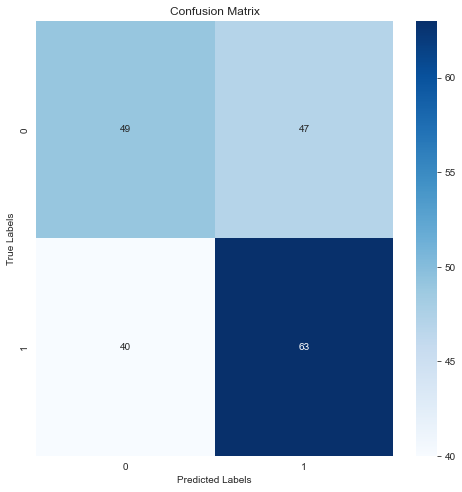

In [80]:
# Evaluate final model on test set
y_test_pred = tabnet_classifier.predict(X_test_np)
evaluate_model("Tabnet (test data)", y_test, y_test_pred)

The best model is Gradient Boosting

In [81]:
the_best_model_ever = xgb_best_estimator

Feature importance

In [82]:
feature_importances = pd.DataFrame(the_best_model_ever.feature_importances_,
                                   index = X_train_preprocessed.columns,
                                    columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
Fixations_In\out_RoI_Ratio_Pre,0.146554
Gaze_In\out_RoI_Ratio_Pre,0.141728
onset_Fixations_First_In_RoI_Post,0.082342
Gaze_Counts_In_RoI_Pre,0.070279
last_onset_Max_Saccades_End_In_RoI_Pre,0.070080
...,...
Saccades_Start_Counts_In_RoI_Pre,0.000000
Pupil radius_Fixations_ReEntry_Mean_Diff_Post,0.000000
Pupil radius_Fixations_ReEntry_Mean_Diff_Pre,0.000000
Pupil radius_Fixations_First_Diff_Post,0.000000
